In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import sys

In [20]:
def mandelbrot_recurs(carr, zarr = None, narr = None, max_iter = 100):
    if zarr is None:
        zarr = np.zeros_like(carr)
        narr = np.zeros(carr.shape,dtype='int')
    idx = np.logical_and(abs(zarr) < 2,narr < max_iter) # cells to keep iterating
    if np.sum(idx)==0: # cells that are finished
        narr[narr == max_iter] = 0
        return narr
    else:
        zarr[idx] = zarr[idx]**2 + carr[idx]
        narr[idx] = narr[idx] + 1
        return mandelbrot_recurs(carr, zarr, narr, max_iter)
    

In [13]:
def mandelbrot_loop(c,max_iter = 100):
    z = 0
    n = 0
    while abs(z) < 2 and n < max_iter:
        z = z*z + c
        n += 1
    if n == max_iter:
        return 0
    return n
mandelbrot_loop = np.vectorize(mandelbrot_loop)

In [21]:
real = np.linspace(-2,1,200)
imag = np.linspace(-1,1,200)
coords = np.sum(np.meshgrid(real,imag*1j),axis=0)

In [22]:
mandelbrot_recurs(coords, max_iter=10)

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]])

In [32]:
times = []
recurs_times = []
for i in range(2,12):
    t0 = datetime.now()
    _ = mandelbrot_loop(coords,2**i)
    times.append(datetime.now()-t0)
    t0 = datetime.now()
    _ = mandelbrot_recurs(coords,max_iter=2**i)
    recurs_times.append(datetime.now()-t0)

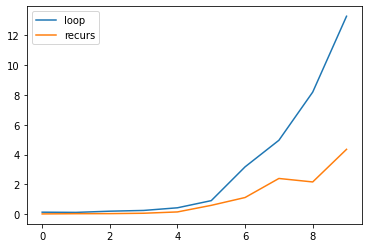

In [33]:
plt.plot([t.total_seconds() for t in times],label='loop')
plt.plot([t.total_seconds() for t in recurs_times],label='recurs')
plt.legend();

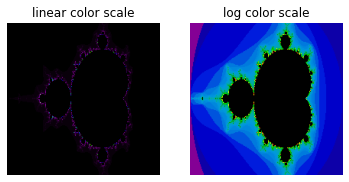

In [40]:
y = _
plt.subplot(121)
plt.imshow(cm.nipy_spectral(y/y.max()))
plt.axis('off')
plt.title('linear color scale')
y = np.log(1+y)
plt.subplot(122)
plt.imshow(cm.nipy_spectral(y/y.max()))
plt.title('log color scale')
plt.axis('off');